In [1]:
# check the performance benchmarks between two versions
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "gtracr"))

from trajectory import Trajectory
from constants import EARTH_RADIUS

import time

In [2]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2e}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12.0)

In [3]:
# initial variables chosen since it has a well-defined # steps with dt=1e-5, max_time=0.1
# total step size for integrator is 2119
initial_variables = ("p+", 20., 25., 100., 0., 0., 0., 10.)
plabel, zenith, azimuth, part_alt, lat, lng, dec_alt, rig = initial_variables

In [4]:
# should be in Monte carlo in the future
traj_dip = Trajectory(
        plabel,
        latitude=lat,
        longitude=lng,
        detector_altitude=dec_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=part_alt,
        rigidity=rig,
        bfield_type="dipole"
    )

traj_igrf = Trajectory(
        plabel,
        latitude=lat,
        longitude=lng,
        detector_altitude=dec_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=part_alt,
        rigidity=rig,
        bfield_type="igrf"
    )

In [5]:
max_iter = 200    # maximum number of iterations
dt = 1e-5    # step size in integration
max_step = 10000   # max steps in integration
# max_time = 0.1 # max time for integration
# initialize performance benchmark time variables
time_python_dip = 0.
time_cpp_novec_dip = 0.
time_cpp_vec_dip = 0.
time_python_igrf = 0.
time_cpp_novec_igrf = 0.
time_cpp_vec_igrf = 0.
time_hydra = 0.

In [6]:
# python, dipole
for i in range(max_iter):
    # evaluate for python version
    start_time_python_dip = time.time()
    traj_dip.get_trajectory(dt=dt, max_step=max_step, use_python=True)  
    stop_time_python_dip = time.time()
    time_python_dip += stop_time_python_dip - start_time_python_dip

In [7]:
# C++, unvectorized, dipole
for i in range(max_iter):
    # evaluate for the C++ version unvectorized
    start_time_cpp_novec_dip = time.time()
    traj_dip.get_trajectory(dt=dt, max_step=max_step, use_unvectorized=True)  
    stop_time_cpp_novec_dip = time.time()
    time_cpp_novec_dip += stop_time_cpp_novec_dip - start_time_cpp_novec_dip

In [8]:
# C++, vectorized, dipole
for i in range(max_iter):
    # evaluate for the C++ version vectorized
    start_time_cpp_vec_dip = time.time()
    traj_dip.get_trajectory(dt=dt, max_step=max_step)  
    stop_time_cpp_vec_dip = time.time()
    time_cpp_vec_dip += stop_time_cpp_vec_dip - start_time_cpp_vec_dip

In [9]:
# python, igrf
for i in range(max_iter):
    # evaluate for python version
    start_time_python_igrf = time.time()
    traj_igrf.get_trajectory(dt=dt, max_step=max_step, use_python=True)  
    stop_time_python_igrf = time.time()
    time_python_igrf += stop_time_python_igrf - start_time_python_igrf

KeyboardInterrupt: 

In [ ]:
# C++, unvectorized, igrf
for i in range(max_iter):
    # evaluate for the C++ version unvectorized
    start_time_cpp_novec_igrf = time.time()
    traj_igrf.get_trajectory(dt=dt, max_step=max_step, use_unvectorized=True)  
    stop_time_cpp_novec_igrf = time.time()
    time_cpp_novec_igrf += stop_time_cpp_novec_igrf - start_time_cpp_novec_igrf

In [ ]:
# C++, vectorized, igrf
for i in range(max_iter):
    # evaluate for the C++ version vectorized
    start_time_cpp_vec_igrf = time.time()
    traj_igrf.get_trajectory(dt=dt, max_step=max_step)  
    stop_time_cpp_vec_igrf = time.time()
    time_cpp_vec_igrf += stop_time_cpp_vec_igrf - start_time_cpp_vec_igrf

In [ ]:
# get the average values for each of the results
# time_python_igrf = 20000.
avg_timearr_dip = np.array([time_python_dip, time_cpp_novec_dip, time_cpp_vec_dip]) / max_iter
# avg_timearr_dip = np.array([time_cpp_novec_dip, time_cpp_vec_dip]) / max_iter
rel_avgtime_dip = avg_timearr_dip / avg_timearr_dip[-1]
# get the average values for each of the results
avg_timearr_igrf = np.array([time_python_igrf, time_cpp_novec_igrf, time_cpp_vec_igrf]) / max_iter
# avg_timearr_igrf = np.array([time_cpp_novec_dip, time_cpp_vec_dip]) / max_iter
rel_avgtime_igrf = avg_timearr_igrf / avg_timearr_dip[-1]

In [37]:
 # the labels, needs to be modified every time different modification is used
labels = ["Python (Vector)", "C++ (non-Vector)", "C++ (Vector)"] 
# labels = ["C++ (non-Vector)", "C++ (Vector)"] 

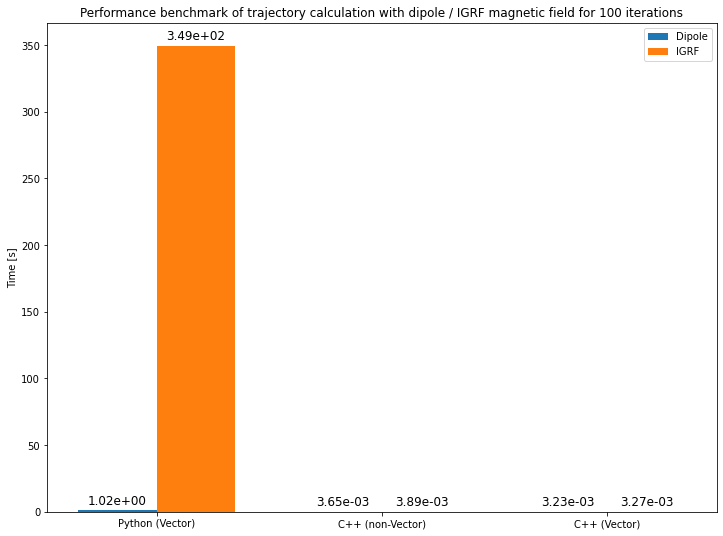

In [38]:

label_pos = np.arange(len(labels))
width = 0.35
# plot the histogram comparing the two values
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')  # to make saved plot have all white bg
bar_dip = ax.bar(label_pos - width/2, avg_timearr_dip, width, label="Dipole")
bar_igrf = ax.bar(label_pos + width/2, avg_timearr_igrf, width, label="IGRF")
# ax.bar(label_pos, rel_avgtime_dip, width)
ax.set_xticks(label_pos)
ax.set_xticklabels(labels)
ax.set_ylabel("Time [s]")
# ax.set_ylabel("Scale Factor relative to {:s} result".format(labels[-1]))
ax.set_title("Performance benchmark of trajectory calculation with dipole / IGRF magnetic field for {:d} iterations".format(max_iter))

autolabel(bar_dip)  # add labels at top of bar chart
autolabel(bar_igrf)  # add labels at top of bar chart

ax.legend()

PLOT_DIR = os.path.join(os.getcwd(), "..", "..", "..", "gtracr_plots")

# savefig_labels = ["pyvec", "cpp_novec", "cpp_vec"]
plt.savefig(os.path.join(PLOT_DIR, "traj_performance_benchmark_absscale.png"), bbox_inches='tight')

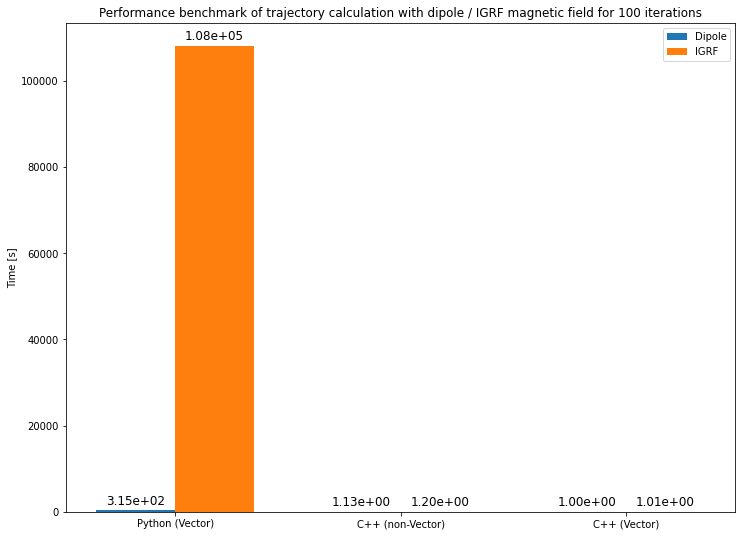

In [39]:

label_pos = np.arange(len(labels))
width = 0.35
# plot the histogram comparing the two values
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')  # to make saved plot have all white bg
bar_dip = ax.bar(label_pos - width/2, rel_avgtime_dip, width, label="Dipole")
bar_igrf = ax.bar(label_pos + width/2, rel_avgtime_igrf, width, label="IGRF")
# ax.bar(label_pos, rel_avgtime_dip, width)
ax.set_xticks(label_pos)
ax.set_xticklabels(labels)
ax.set_ylabel("Time [s]")
# ax.set_ylabel("Scale Factor relative to {:s} result".format(labels[-1]))
ax.set_title("Performance benchmark of trajectory calculation with dipole / IGRF magnetic field for {:d} iterations".format(max_iter))

autolabel(bar_dip)  # add labels at top of bar chart
autolabel(bar_igrf)  # add labels at top of bar chart

ax.legend()

PLOT_DIR = os.path.join(os.getcwd(), "..", "..", "..", "gtracr_plots")

# savefig_labels = ["pyvec", "cpp_novec", "cpp_vec"]
plt.savefig(os.path.join(PLOT_DIR, "traj_performance_benchmark_relscale.png"), bbox_inches='tight')